In [17]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import MySQLdb as Mdb
import numpy as np
import matplotlib.pyplot as plt

sns.set_context("notebook")

In [2]:
def exec_query(query, server, schema):
    res_df = pd.DataFrame()
    
    port = 3306
    if server=="seaquel.physics.illinois.edu":
        port = 3283
    try:
        db = Mdb.connect(read_default_file='../.my.cnf',
                         read_default_group='guest',
                         host=server,
                         port=port,
                         db=schema)

        res_df = pd.read_sql(query, db)
        
        if db:
            db.close()

    except Mdb.Error, e:
        print "Error %d: %s" % (e.args[0], e.args[1])
    
    return res_df

In [3]:
query_scaler = """SELECT spillID, scalerName AS `name`, value
                  FROM Scaler INNER JOIN Spill USING(spillID)
                  WHERE spillID BETWEEN 540000 AND 620000 AND
                        spillType=2 AND
                        Spill.dataQuality=0 AND
                        scalerName IS NOT NULL"""
server = "e906-db3.fnal.gov"
schema = "merged_roadset67_R005_V001"

In [18]:
scaler_df = exec_query(query_scaler, server, schema)
scaler_df.head()

,spillID,name,value
0,571690,AcceptedMATRIX1,2533
1,571690,AcceptedMATRIX2,12
2,571690,AcceptedMATRIX3,21
3,571690,AcceptedMATRIX4,36
4,571690,AcceptedMATRIX5,29


In [19]:
scaler_df.to_csv('scaler.tsv', sep='\t')

In [36]:
scaler_df = pd.read_csv('scaler.tsv', sep='\t', index_col='Unnamed: 0')
scaler_df.head()

,spillID,name,value
0,571690,AcceptedMATRIX1,2533
1,571690,AcceptedMATRIX2,12
2,571690,AcceptedMATRIX3,21
3,571690,AcceptedMATRIX4,36
4,571690,AcceptedMATRIX5,29


In [37]:
pscaler_df = scaler_df.pivot(index='spillID', columns='name', values='value')

In [38]:
del scaler_df

In [39]:
pscaler_df.head()

name,AcceptedBOS,AcceptedEOS,AcceptedMATRIX1,AcceptedMATRIX2,AcceptedMATRIX3,AcceptedMATRIX4,AcceptedMATRIX5,AcceptedNIM1,AcceptedNIM2,AcceptedNIM3,...,RawMATRIX1,RawMATRIX2,RawMATRIX3,RawMATRIX4,RawMATRIX5,RawNIM1,RawNIM2,RawTriggers,TSGo,TsBusy
spillID,,,,,,,,,,,,,,,,,,,,,
540000,0,1,3681,21,28,40,41,49,0,52,...,84061,230917,86099,2868373,509766,2228250,9904378,13893221,3909,3910
540001,0,1,3840,22,35,38,44,45,0,52,...,80397,221868,82490,2788148,493843,2240914,10040744,13933914,4069,4069
540002,0,1,3705,21,33,38,41,40,0,54,...,79045,222625,81001,2824817,502613,2204264,9851692,13774852,3926,3927
540007,0,1,3046,17,22,37,33,48,0,56,...,57363,175820,58335,2600263,417793,2233491,9438458,13138362,3256,3257
540008,0,1,3128,17,28,37,34,45,0,55,...,62944,181585,63991,2558630,417644,2214859,9411245,13043575,3336,3337


In [40]:
columns = pscaler_df.columns.values
print len(columns)

44


In [41]:
pscaler_df = pscaler_df.query('spillID < 594000 or spillID > 594500')

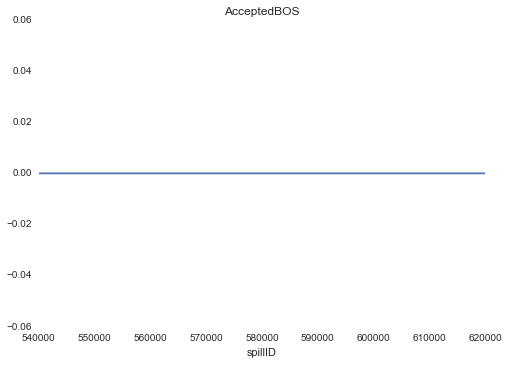

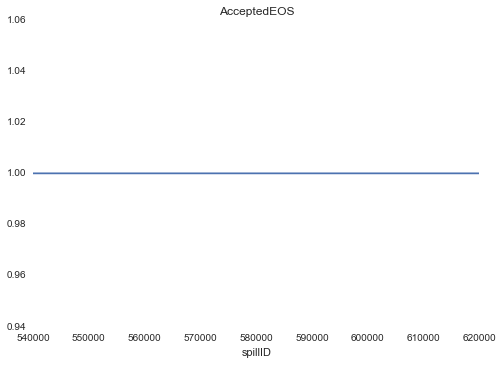

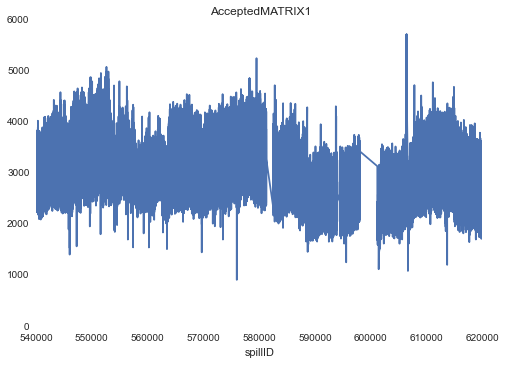

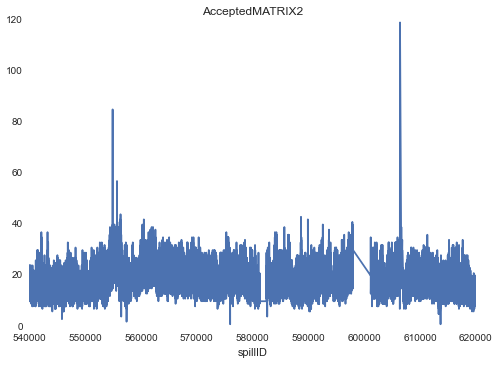

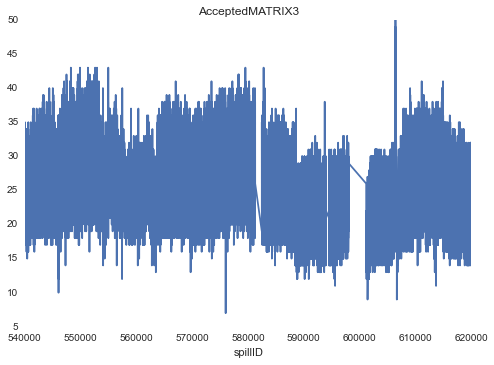

In [42]:
for column in columns[:5]:
    pscaler_df[column].plot()
    plt.title(column)
    plt.show()

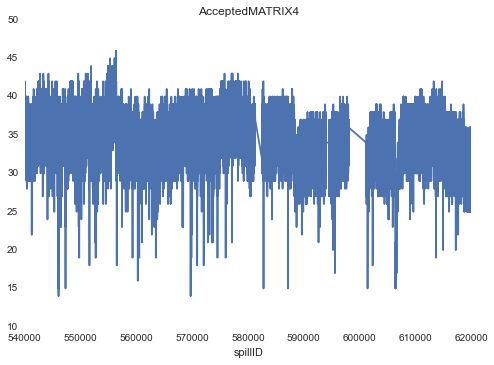

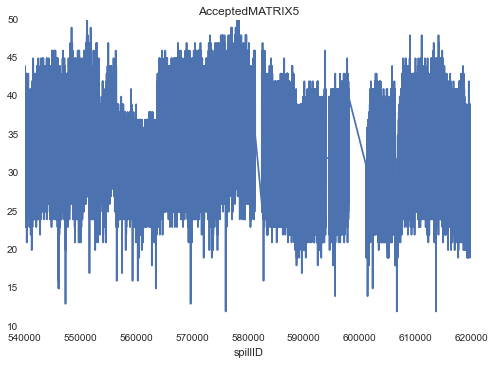

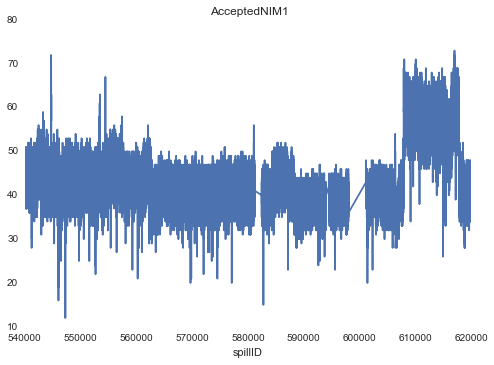

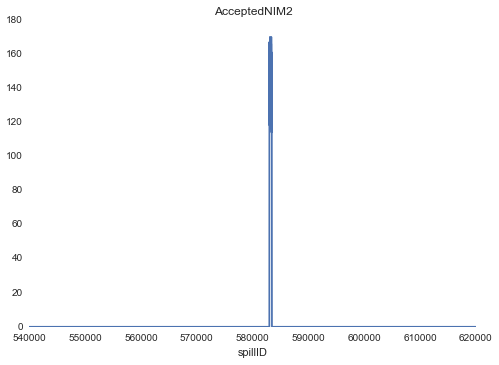

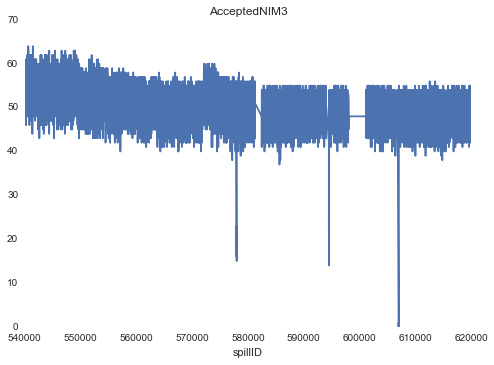

In [43]:
for column in columns[5:10]:
    pscaler_df[column].plot()
    plt.title(column)
    plt.show()

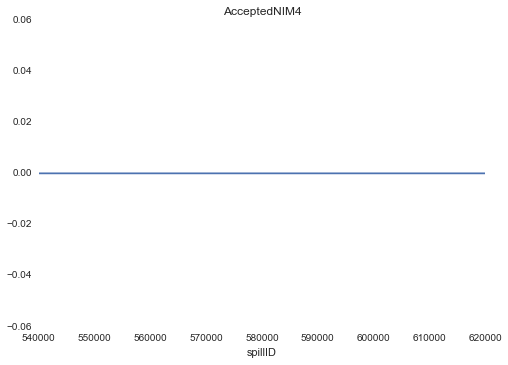

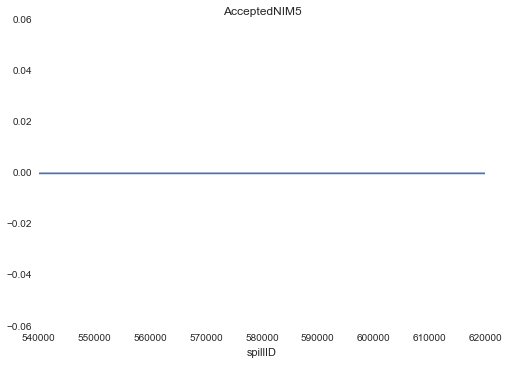

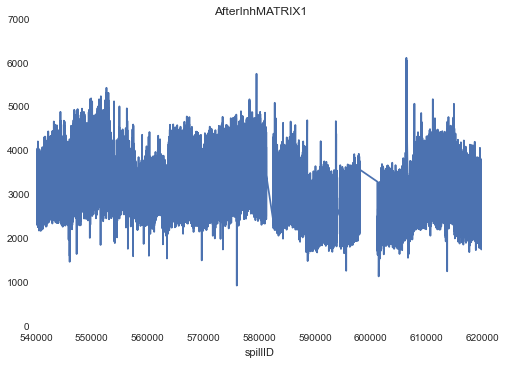

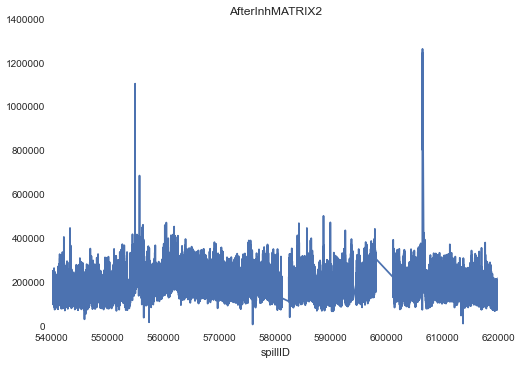

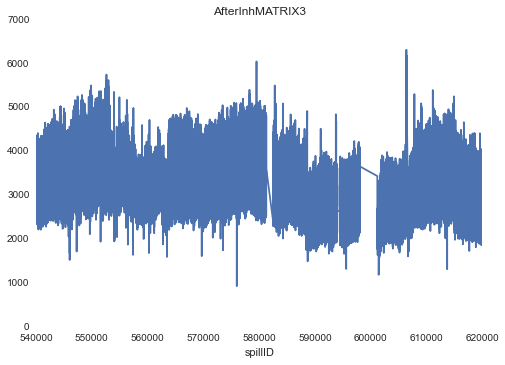

In [44]:
for column in columns[10:15]:
    pscaler_df[column].plot()
    plt.title(column)
    plt.show()

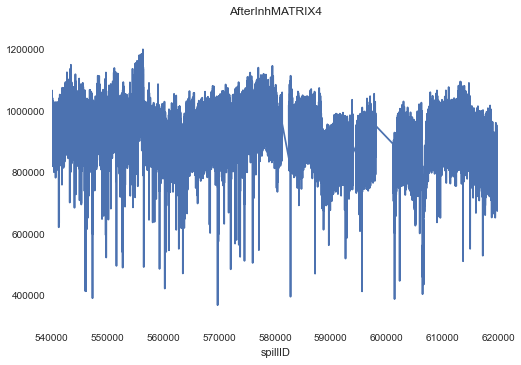

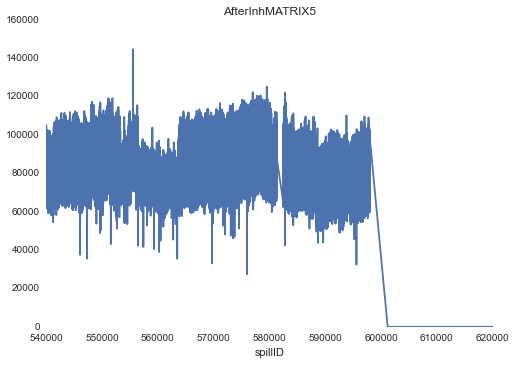

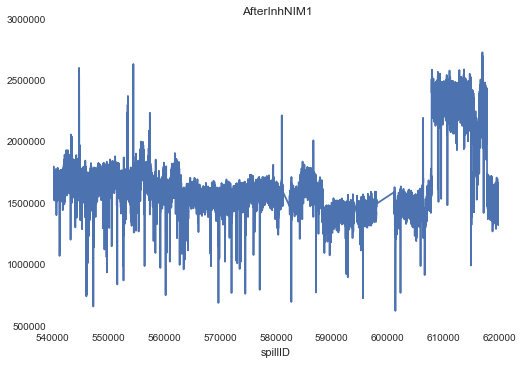

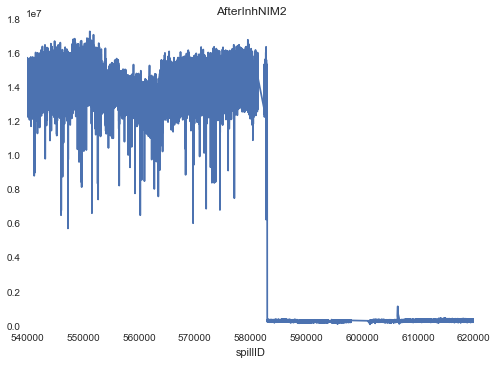

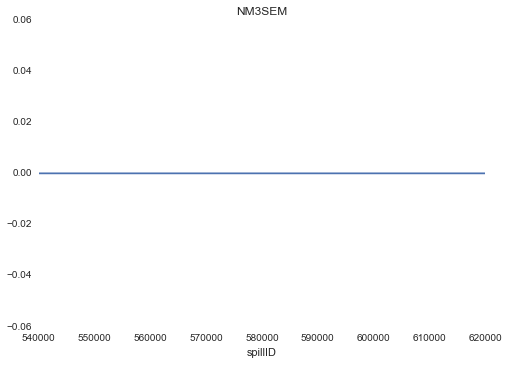

In [53]:
for column in columns[15:20]:
    pscaler_df[column].plot()
    plt.title(column)
    plt.show()

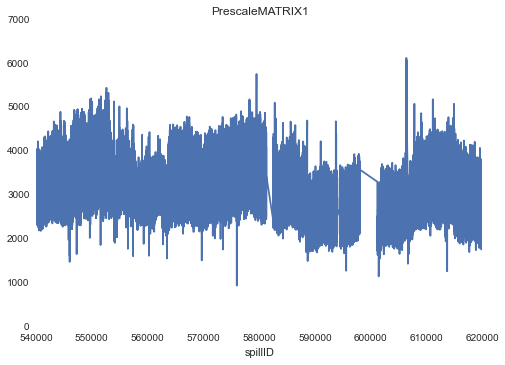

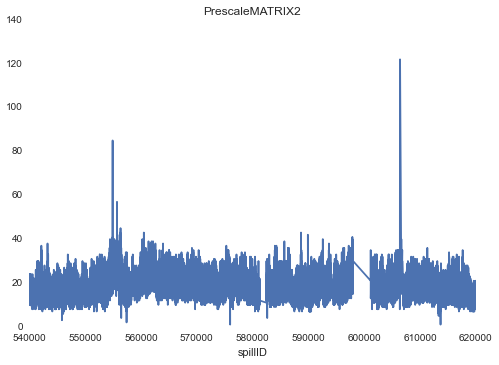

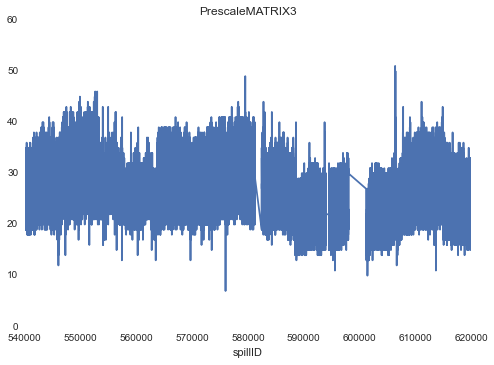

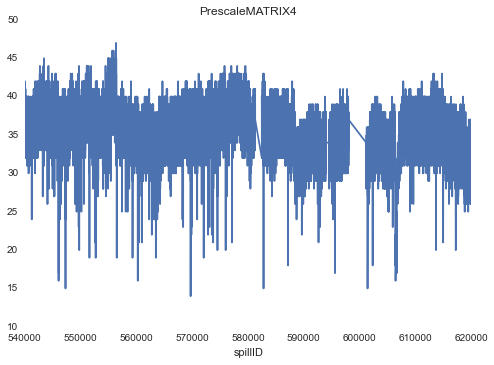

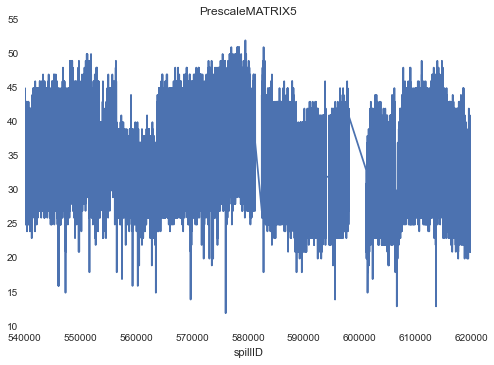

In [54]:
for column in columns[20:25]:
    pscaler_df[column].plot()
    plt.title(column)
    plt.show()

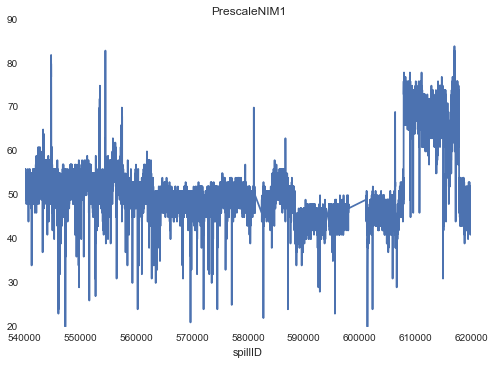

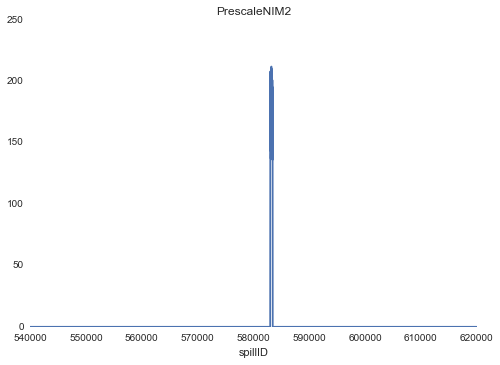

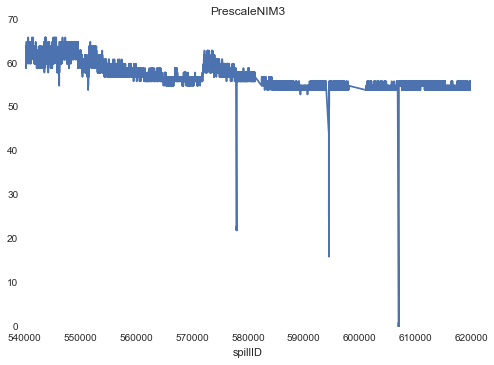

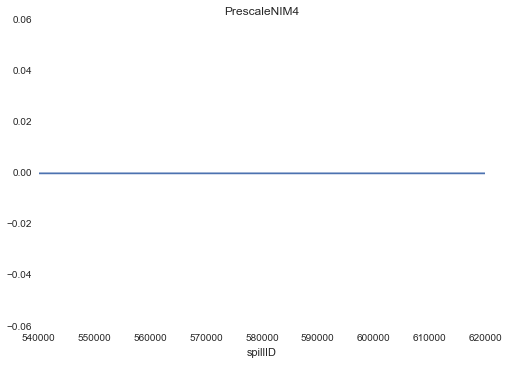

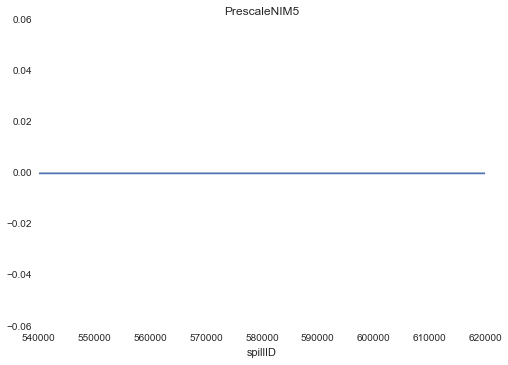

In [55]:
for column in columns[25:30]:
    pscaler_df[column].plot()
    plt.title(column)
    plt.show()

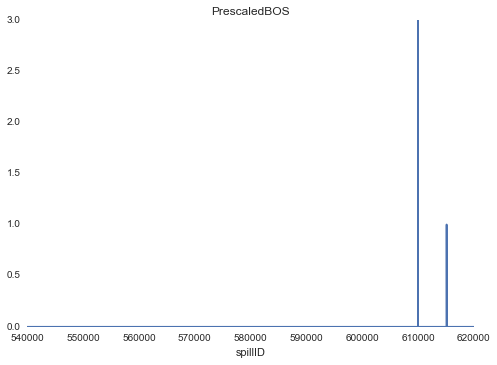

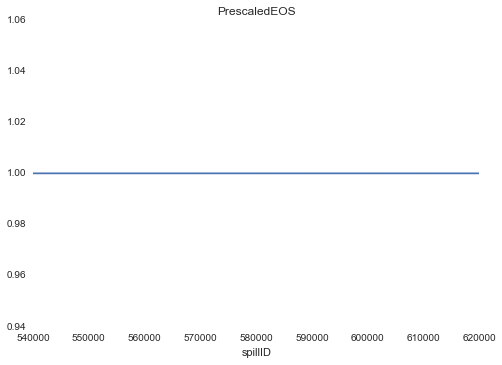

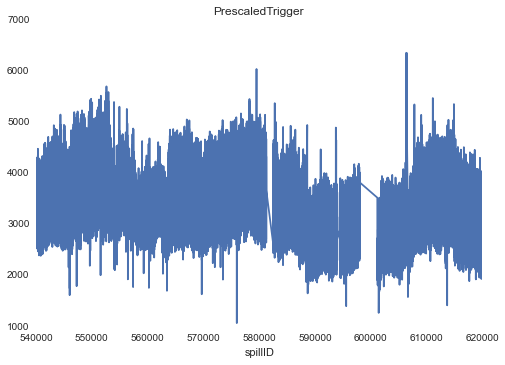

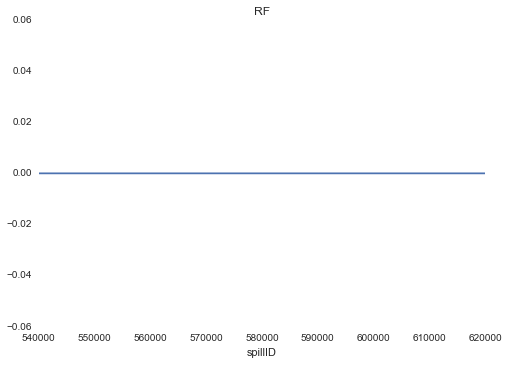

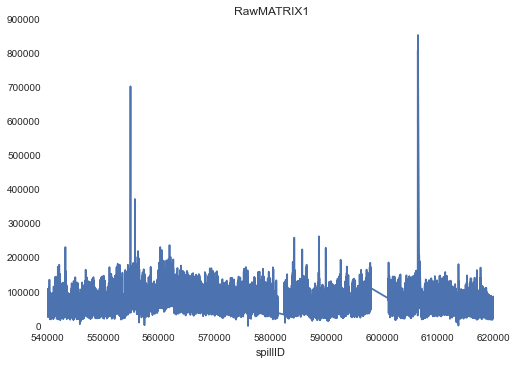

In [56]:
for column in columns[30:35]:
    pscaler_df[column].plot()
    plt.title(column)
    plt.show()

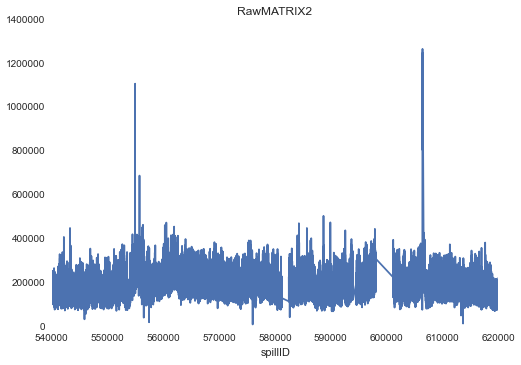

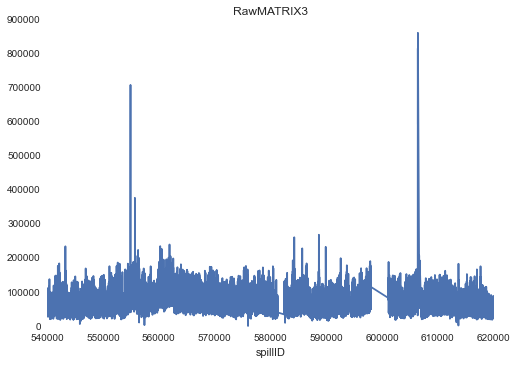

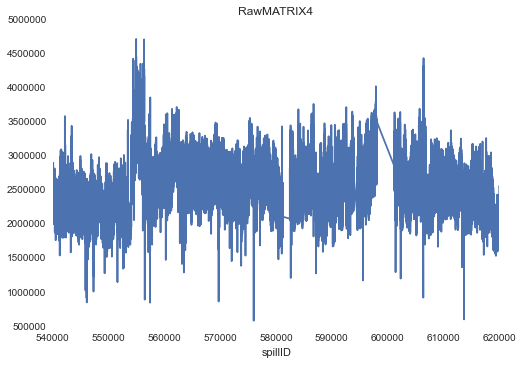

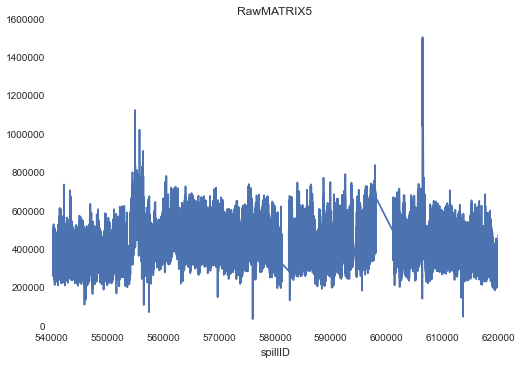

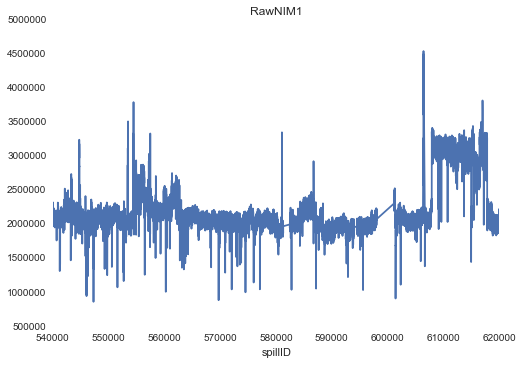

In [57]:
for column in columns[35:40]:
    pscaler_df[column].plot()
    plt.title(column)
    plt.show()

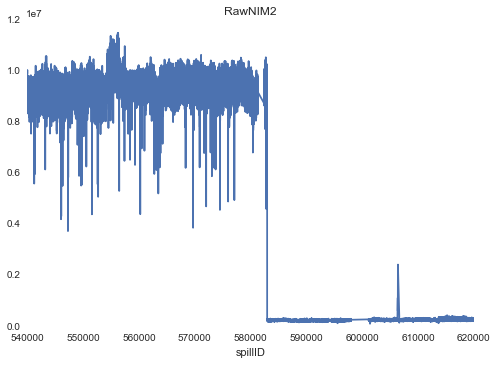

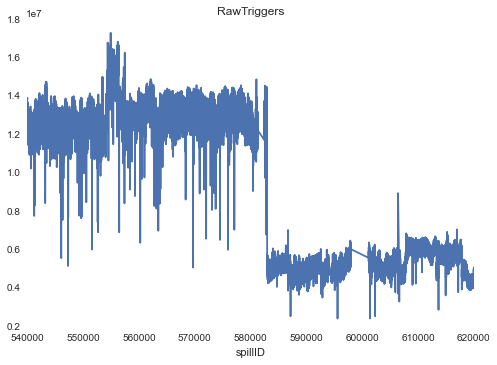

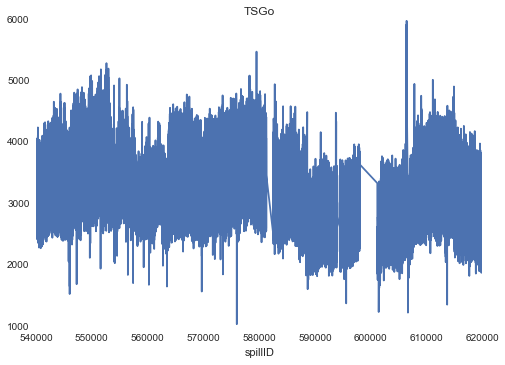

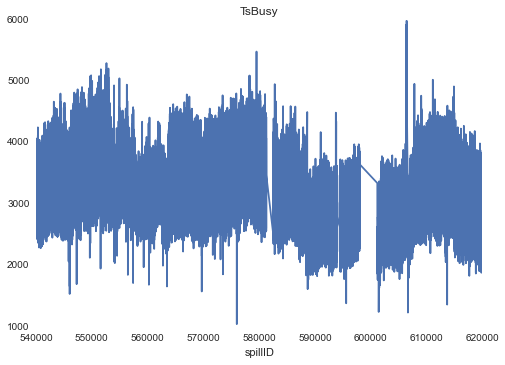

In [50]:
for column in columns[40:]:
    pscaler_df[column].plot()
    plt.title(column)
    plt.show()

# Notes From Scaler:

### NIM1

* This has a sharp rise at about 610000 where the jump occurs
* No similar fall at 550000 where one would expect if this were the cause
* Seen in Accepted, Raw, Prescale, AfterInh plots

### Spikes near 550k and 610k

* AfterInh, Accepted, Raw, and Prescale MATRIX2
* RawMATRIX1-5

In [109]:
query_beam = """SELECT spillID, name, value
                FROM Beam INNER JOIN Spill USING(spillID)
                WHERE spillID BETWEEN 600000 AND 620000 AND
                      Spill.dataQuality=0 AND
                      name IS NOT NULL"""
server = "e906-db3.fnal.gov"
schema = "merged_roadset67_R005_V001"

In [110]:
beam_df = exec_query(query_beam, server, schema)
beam_df.head()

,spillID,name,value
0,601169,F:NS2FLO,255.178125
1,601169,F:NS2SUP,97.9619140625
2,601169,F:NS2RET,104.388916016
3,601169,F:NM2V,1.28784179688
4,601169,F:NM2D1,723.419189453


In [111]:
pbeam_df = beam_df.pivot(index='spillID', columns='name', values='value')

In [112]:
del beam_df

In [113]:
pbeam_df.head()

name,E:M2C2HF,E:M2C2HI,E:M2C2HM,E:M2C2HS,E:M2C2VF,E:M2C2VI,E:M2C2VM,E:M2C2VS,E:M3TGHF,E:M3TGHI,...,I:BEAM21,I:FTSDF,I:VFOUT,L:CBAR,M:OUTTMP,S:F1SEM,S:G2SEM,S:KTEVTC,S:MSEP1U,U:TODB25
spillID,,,,,,,,,,,,,,,,,,,,,
601169,0.0,0.0,-24.5,0.0,0.0,0.0,-24.5,0.0,0.0,0.0,...,7.30921506882,54.5428872108,3103469.25,992.213458252,34.3536124408,41154915294.0,5.93606199356e+12,0.00910258800841,226.390625,-9999
601170,0.0,0.0,-24.5,0.0,0.0,0.0,-24.5,0.0,0.0,0.0,...,7.24741458893,52.4999320507,2805814.0,992.213458252,34.0745424449,44923139136.0,5.90041148814e+12,0.00828477488482,226.359375,-9999
601171,0.0,0.0,-24.5,0.0,0.0,0.0,-24.5,0.0,0.0,0.0,...,7.32643604279,56.5572440624,3103447.25,992.365814209,34.0745424449,42022400376.0,5.92430491198e+12,0.00809207070139,226.328125,-9999
601172,0.0,0.0,-24.5,0.0,0.0,0.0,-24.5,0.0,0.0,0.0,...,7.25856161118,50.8929491043,3000808.5,992.403903198,34.0745424449,96756056922.0,5.77007222894e+12,0.00790384882469,209.515625,-9999
601173,0.0,0.0,-24.5,0.0,0.0,0.0,-24.5,0.0,0.0,0.0,...,7.43264484406,50.5922555923,3103124.75,992.403903198,34.004774946,92276331120.0,5.87462176081e+12,0.00736504651766,209.484375,-9999


In [114]:
columns = pbeam_df.columns.values
for column in columns:
    pbeam_df[column] = pbeam_df[column].astype(float)

E:M2C2HF


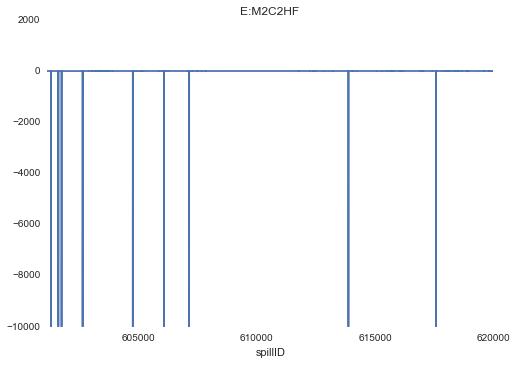

E:M2C2HI


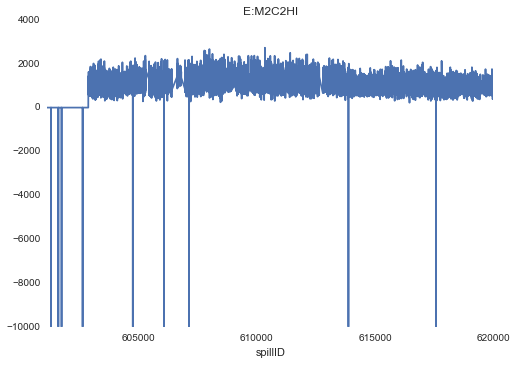

E:M2C2HM


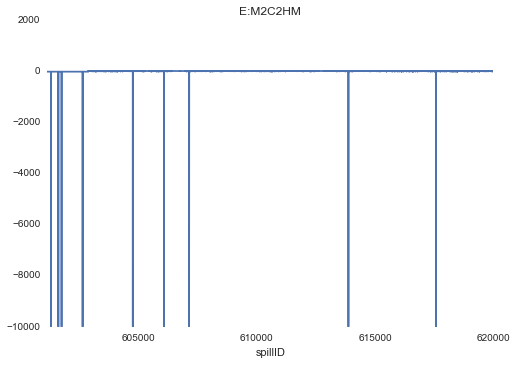

E:M2C2HS


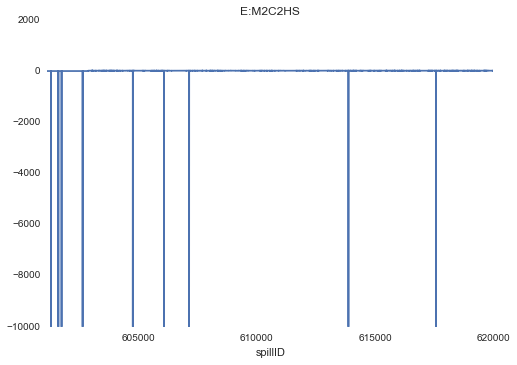

E:M2C2VF


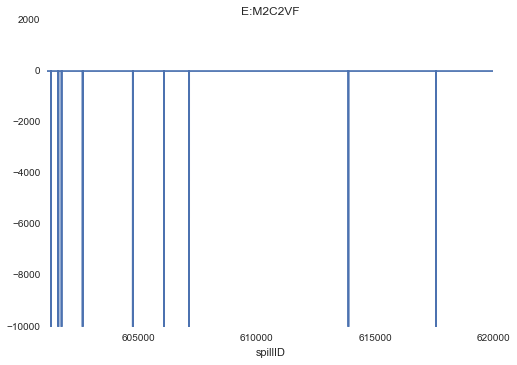

E:M2C2VI


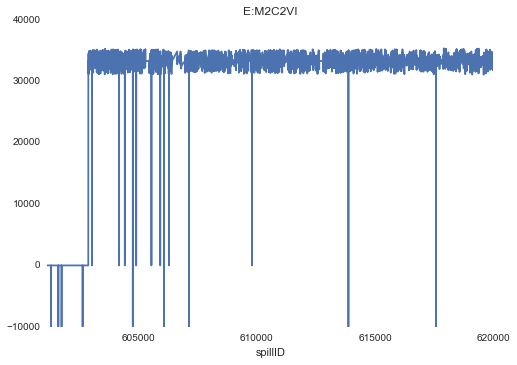

E:M2C2VM


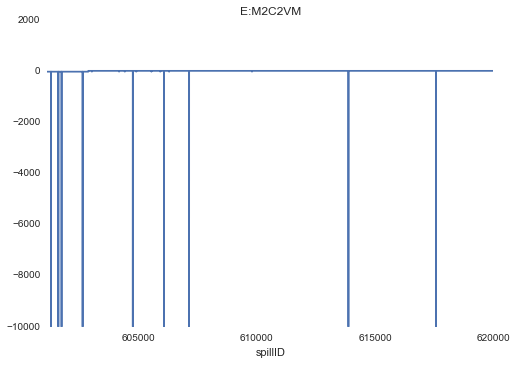

E:M2C2VS


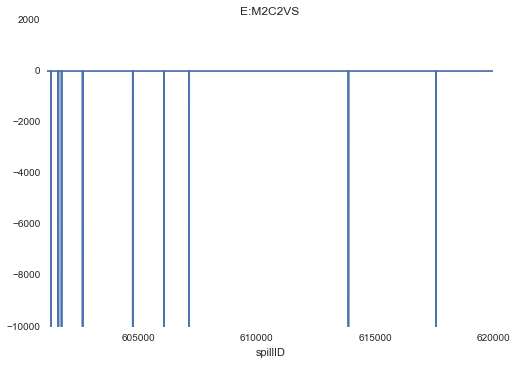

E:M3TGHF


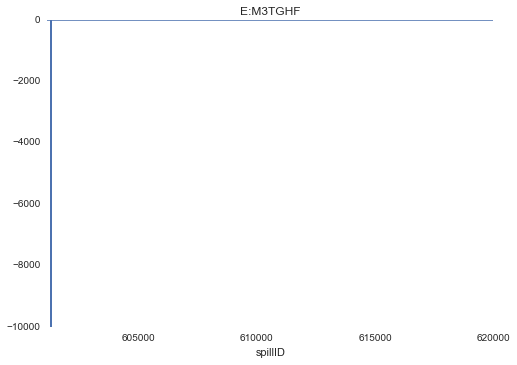

E:M3TGHI


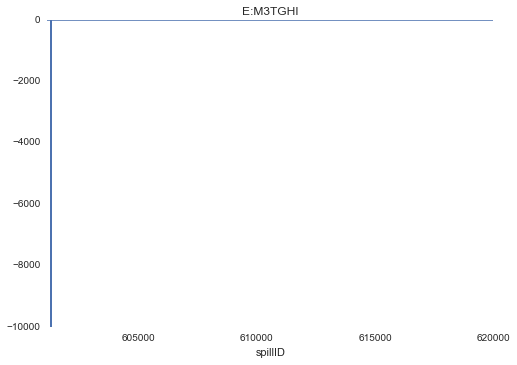

E:M3TGHM


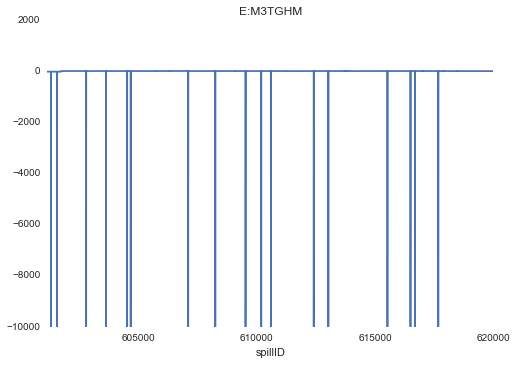

E:M3TGHS


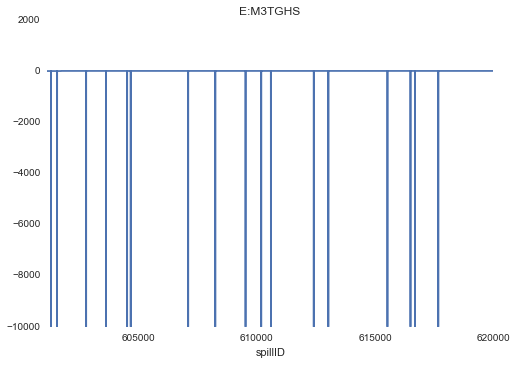

E:M3TGVF


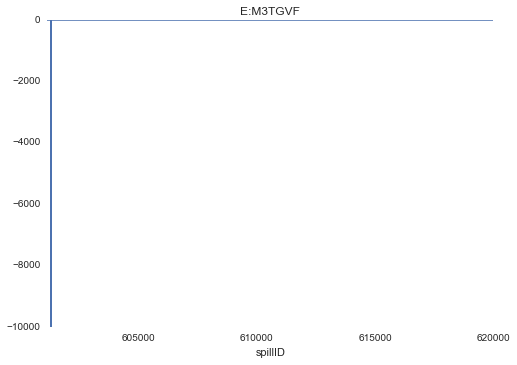

E:M3TGVI


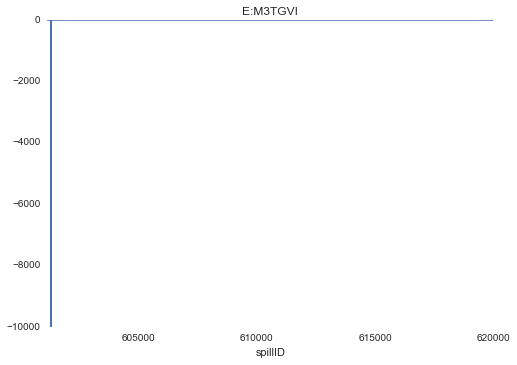

E:M3TGVM


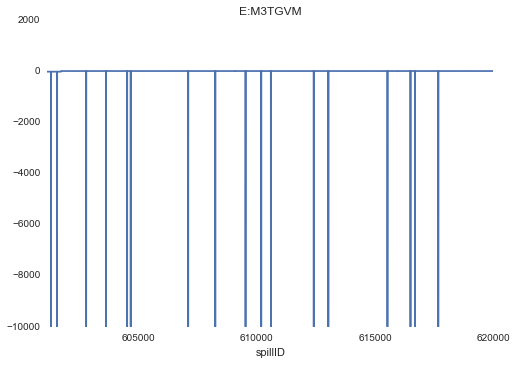

In [115]:
for column in columns[:15]:
    print column
    pbeam_df[column].plot()
    plt.title(column)
    plt.show()

E:M3TGVS


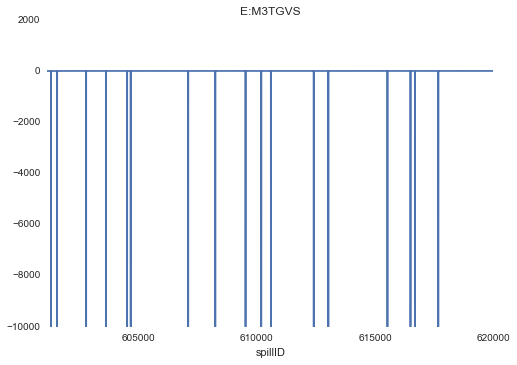

F:E906BM


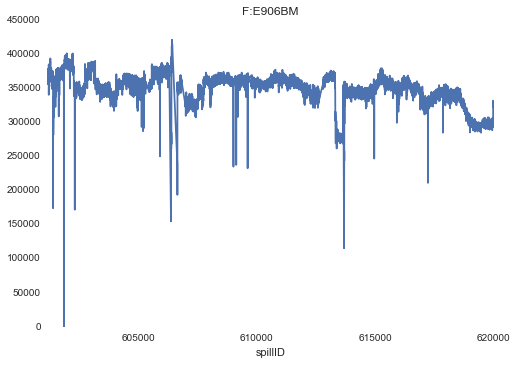

F:MC1D


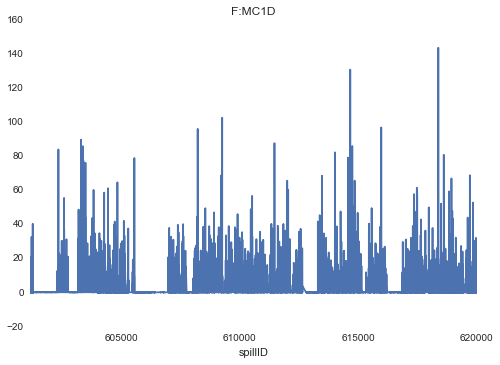

F:MC7SC1


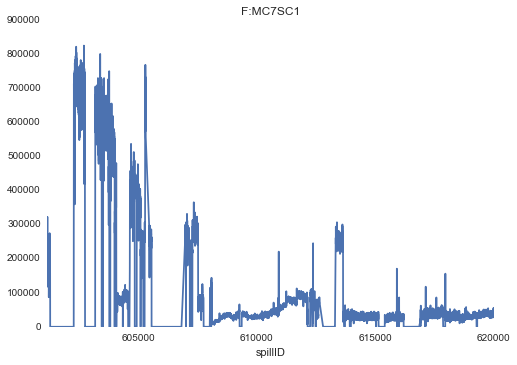

F:MT6SC1


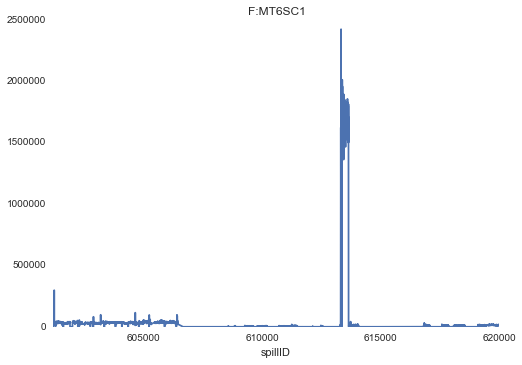

F:MW1W


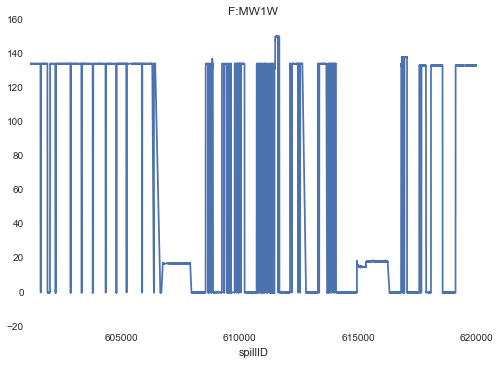

F:NM2D1


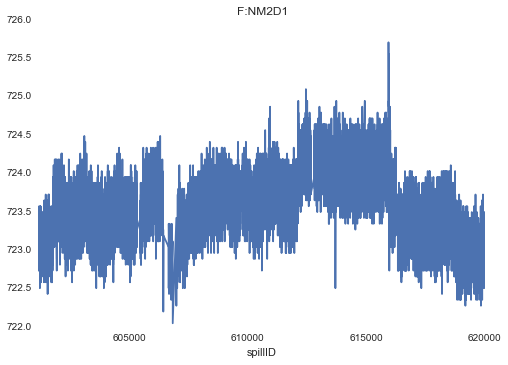

F:NM2H


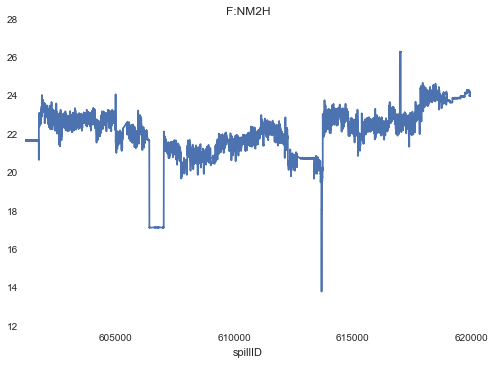

F:NM2ION


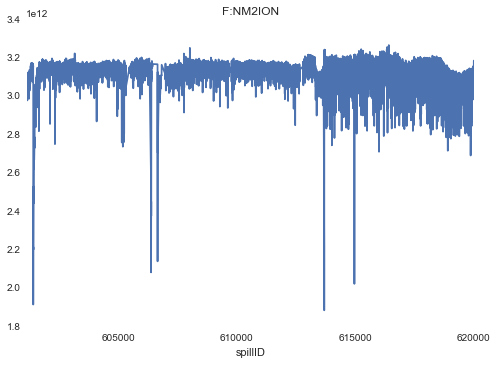

F:NM2Q1


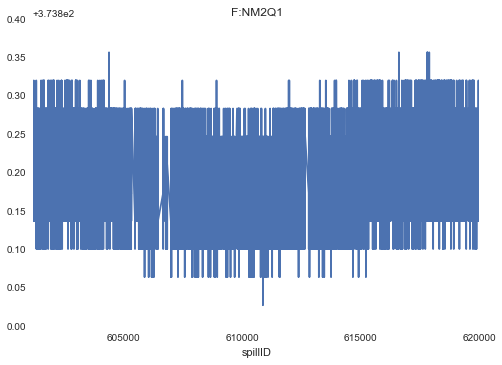

F:NM2Q2


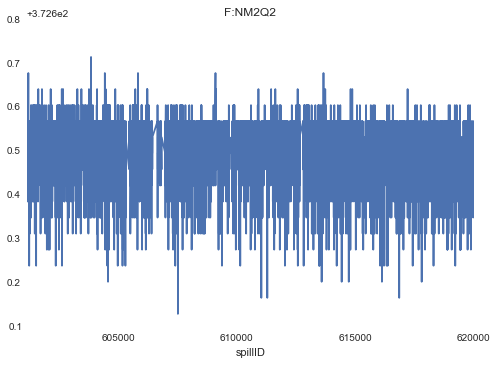

F:NM2V


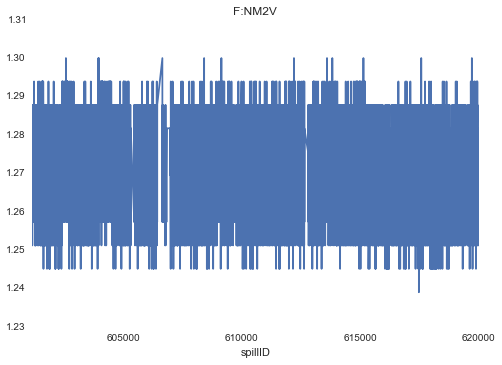

F:NM3ION


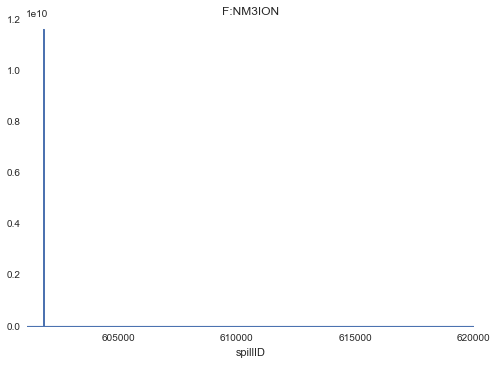

F:NM3RRT


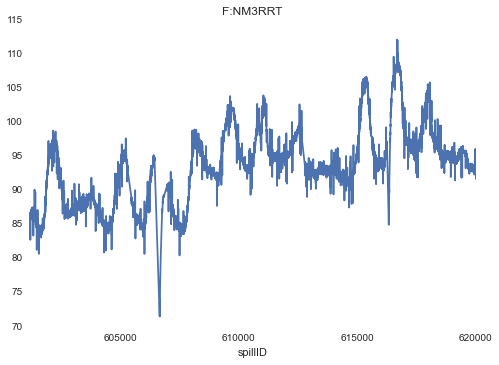

F:NM3RST


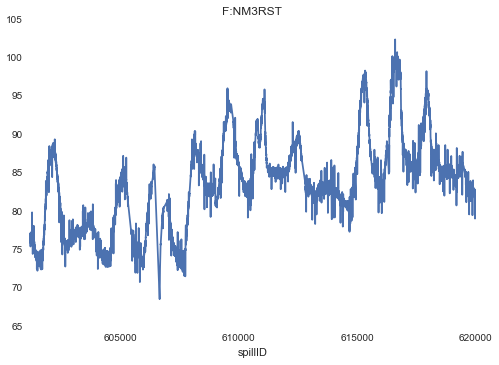

In [116]:
for column in columns[15:30]:
    print column
    pbeam_df[column].plot()
    plt.title(column)
    plt.show()

F:NM3S


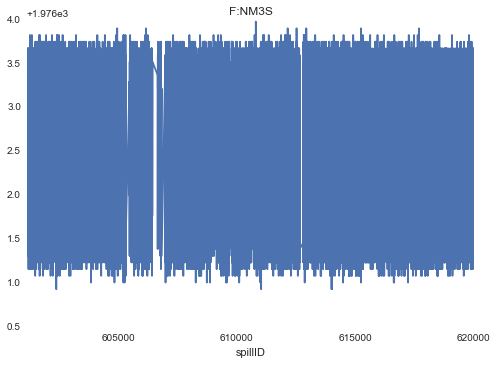

F:NM3SEM


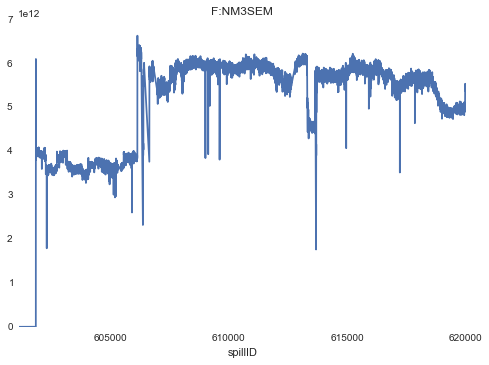

F:NM4AN


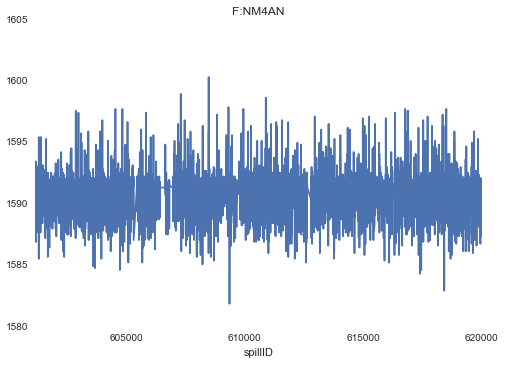

F:NS2FLO


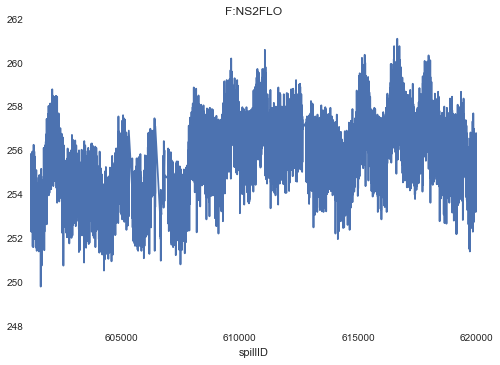

F:NS2RET


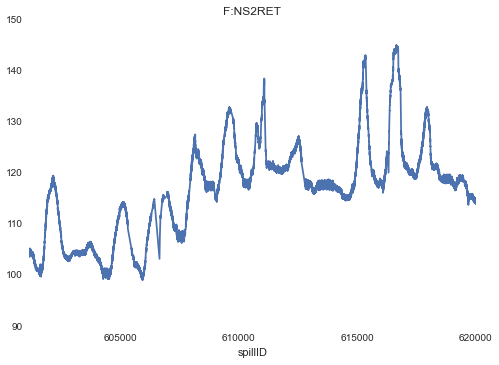

F:NS2SUP


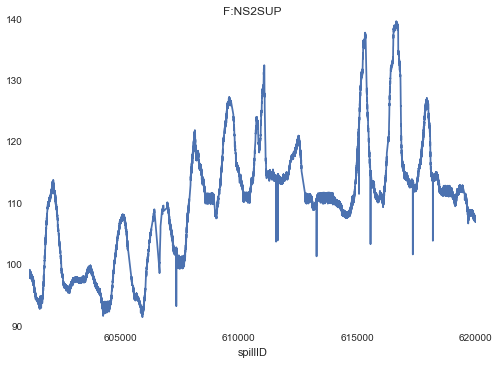

F:NS7DFP


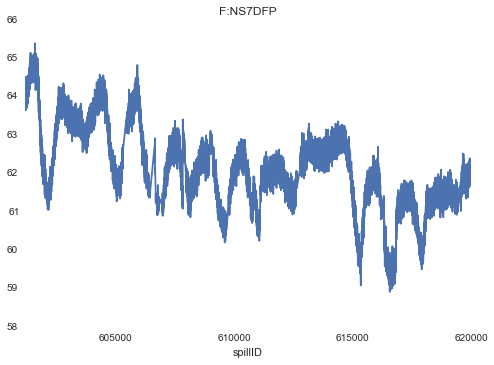

G:BNCH13


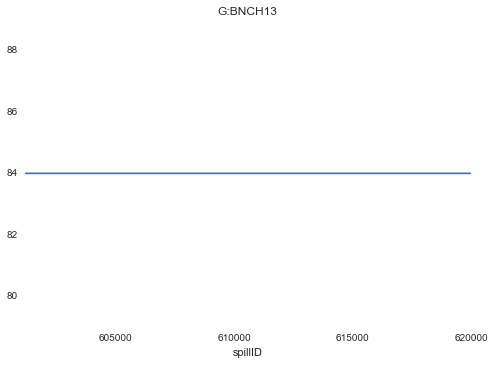

G:NBSYD


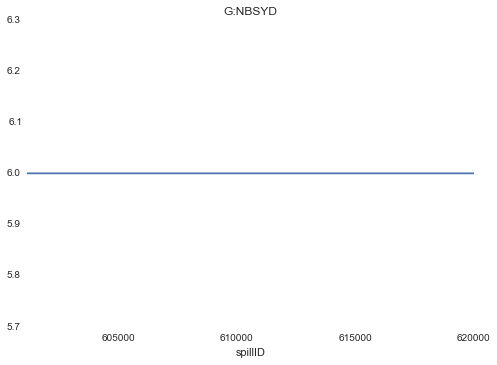

G:RD3161


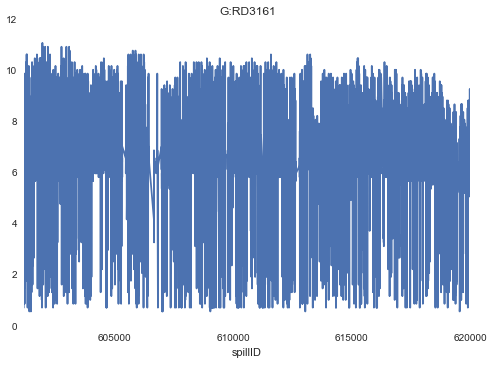

G:RD3162


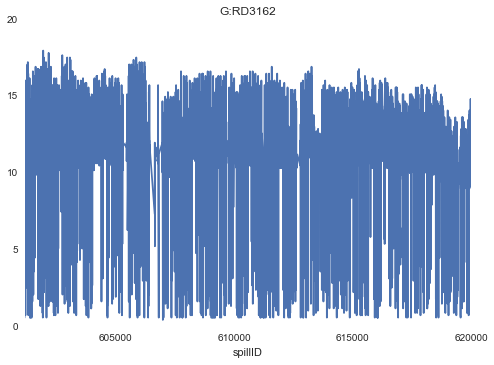

G:TURN13


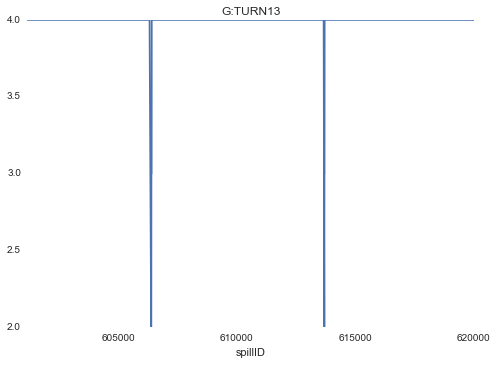

I:BEAM21


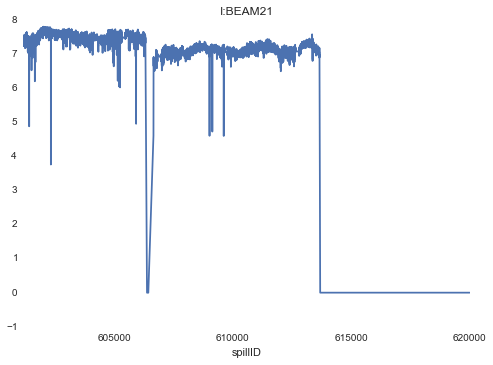

I:FTSDF


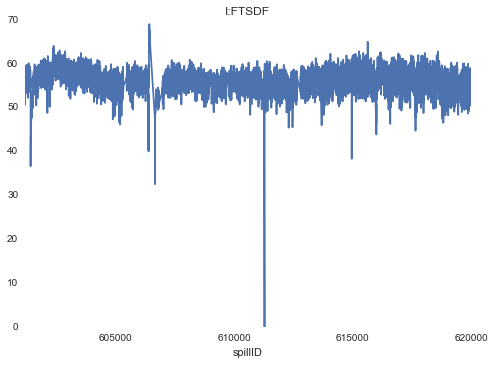

I:VFOUT


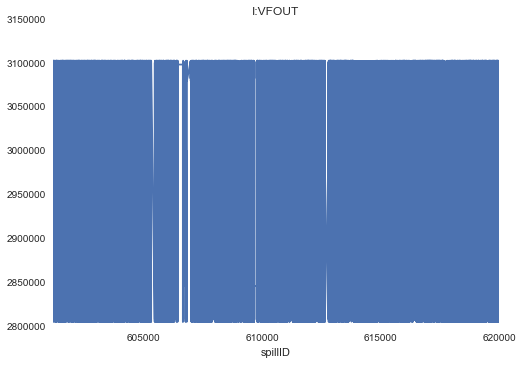

In [117]:
for column in columns[30:45]:
    print column
    pbeam_df[column].plot()
    plt.title(column)
    plt.show()

L:CBAR


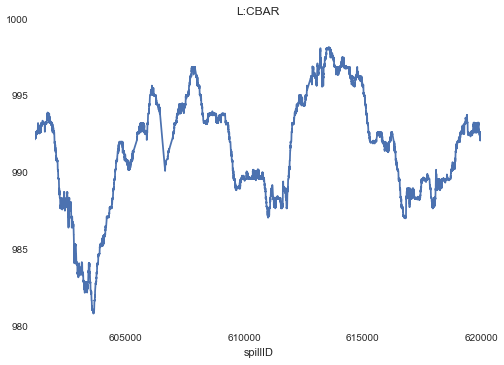

M:OUTTMP


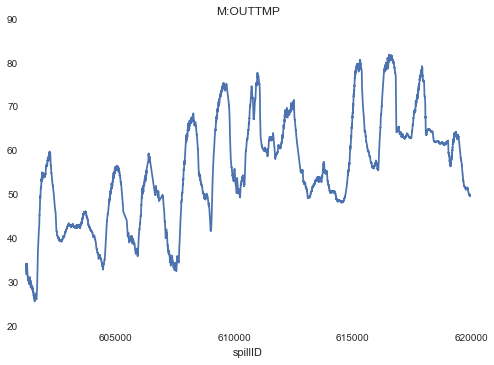

S:F1SEM


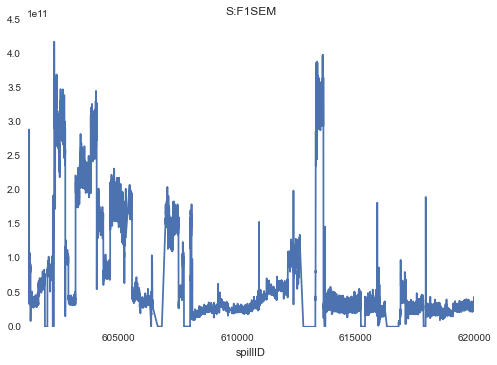

S:G2SEM


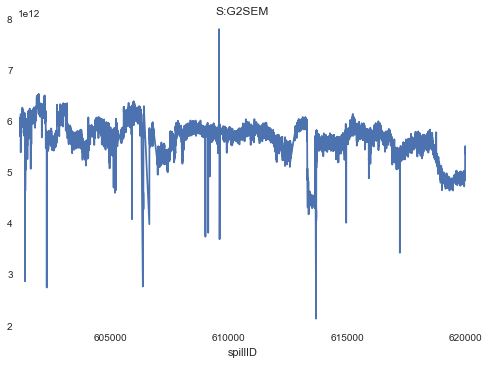

S:KTEVTC


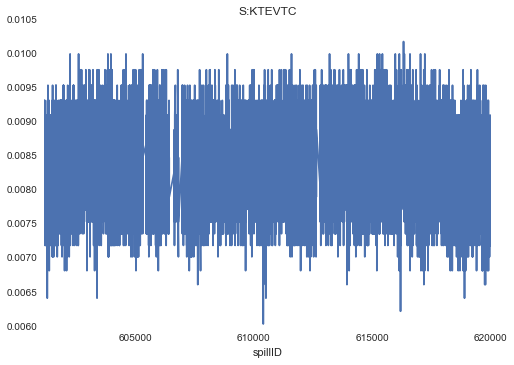

S:MSEP1U


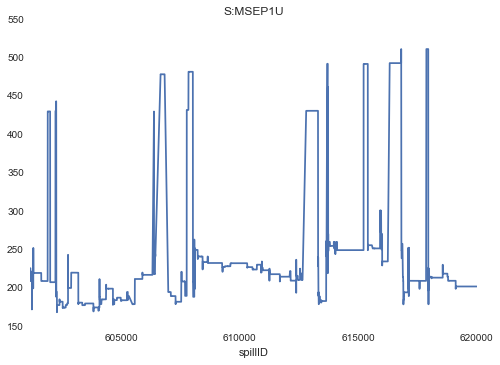

U:TODB25


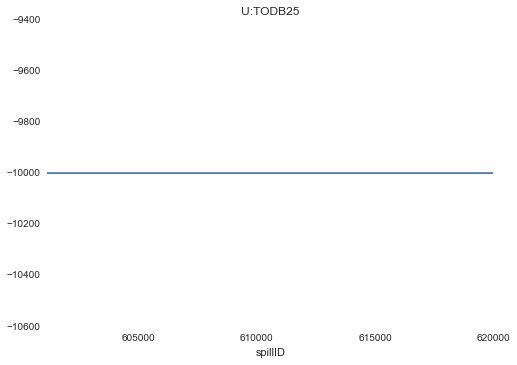

In [118]:
for column in columns[45:]:
    print column
    pbeam_df[column].plot()
    plt.title(column)
    plt.show()

In [85]:
query_run = """SELECT runID, name, value
               FROM Run
               WHERE runID BETWEEN 13700 AND 15000 AND
                     name NOT IN('runDate', 'runTime', 'runDescriptor')"""

In [86]:
run_df = exec_query(query_run, server, schema)
run_df.head()

,runID,name,value
0,14190,NIM1Enabled,1
1,14190,NIM2Enabled,0
2,14190,NIM3Enabled,1
3,14190,NIM4Enabled,0
4,14190,NIM5Enabled,1


In [87]:
prun_df = run_df.pivot(index='runID', columns='name', values='value')
del run_df
prun_df.head()

name,FMAG-Avg,KMAG-Avg,MATRIX1Enabled,MATRIX1Events,MATRIX1Prescale,MATRIX2Enabled,MATRIX2Events,MATRIX2Prescale,MATRIX3Enabled,MATRIX3Events,...,TargetEmpty,TargetLD2,TargetLH2,TargetSolid1,TargetSolid2,TargetSolid3,TargetSolid4,hitCount,spillCount,triggerHitCount
runID,,,,,,,,,,,,,,,,,,,,,
13700,1978.431,1591.550,1,113777,1,1,533,10000,1,956,...,1,1,1,1,1,1,1,0,39,6732324
13701,1978.886,1591.436,1,170948,1,1,874,10000,1,1436,...,1,1,1,1,1,1,1,0,52,10169334
13702,1978.793,1591.383,1,172229,1,1,754,10000,1,1433,...,1,1,1,1,1,1,1,0,59,10216435
13703,1978.779,1591.114,1,171742,1,1,762,10000,1,1439,...,1,1,1,1,1,1,1,0,58,10180428
13704,1978.718,1591.720,1,173007,1,1,844,10000,1,1462,...,1,1,1,1,1,1,1,0,58,10279485


In [88]:
columns = prun_df.columns.values
for column in columns:
    prun_df[column] = prun_df[column].astype(float)

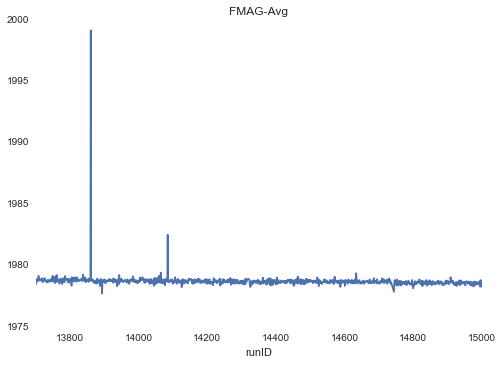

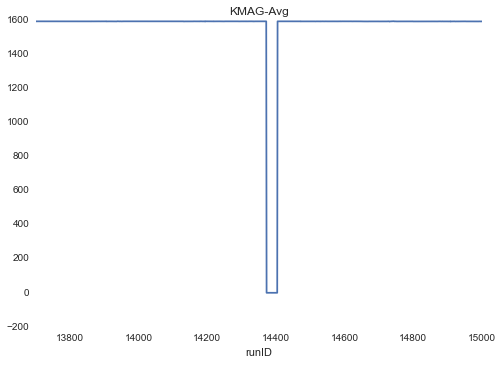

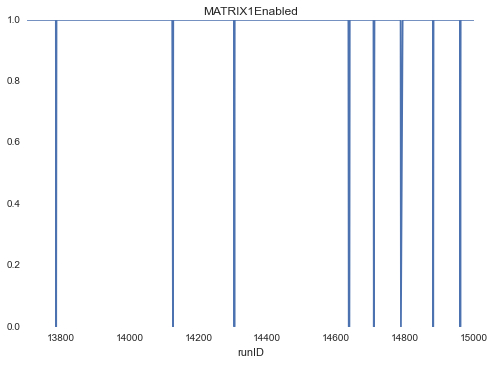

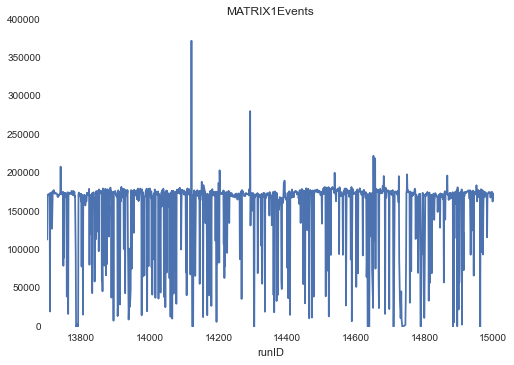

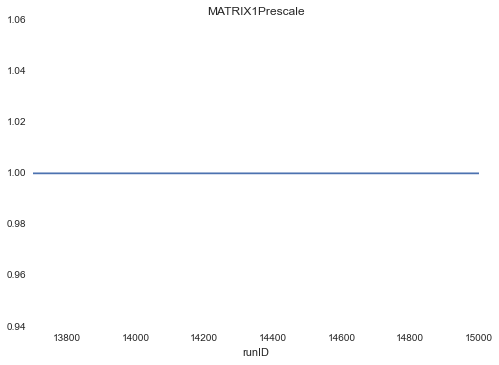

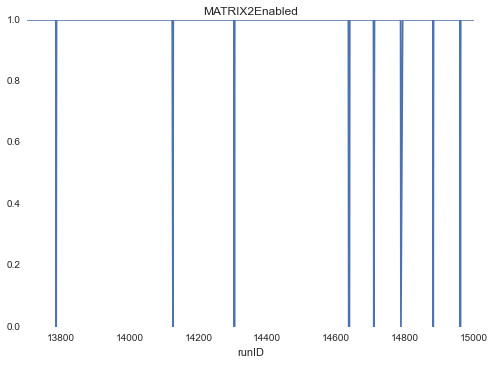

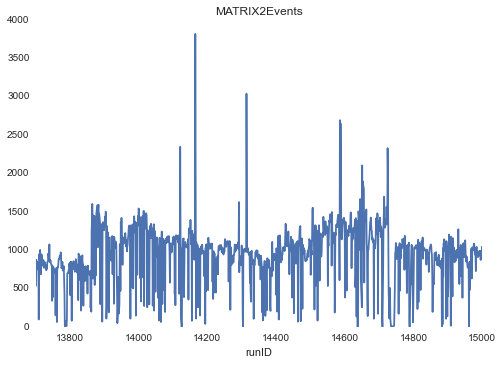

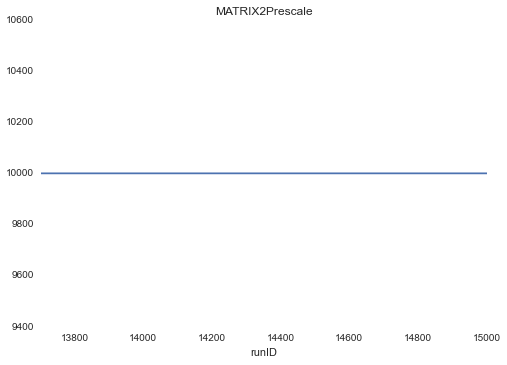

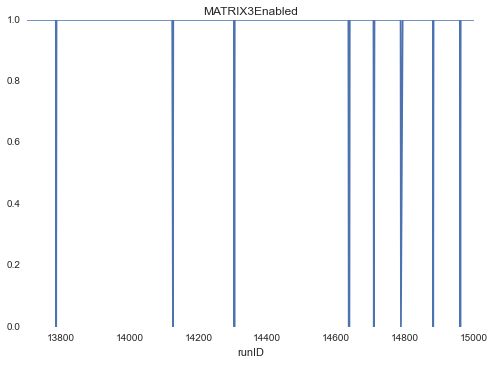

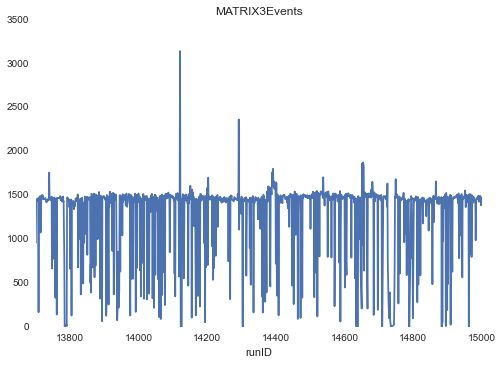

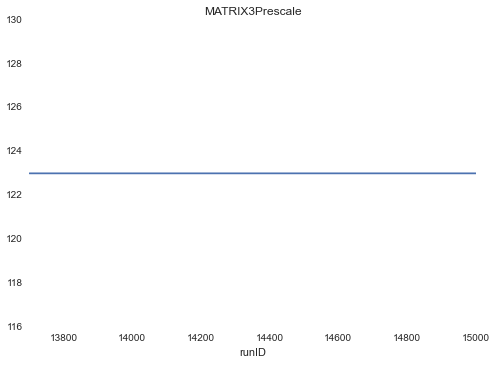

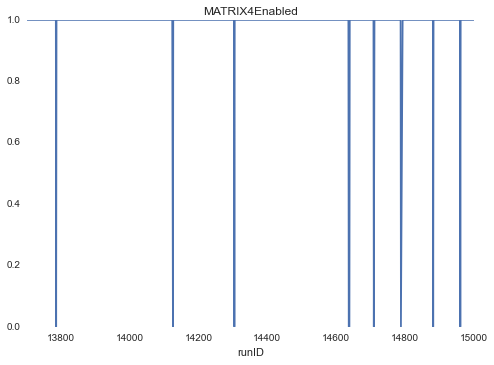

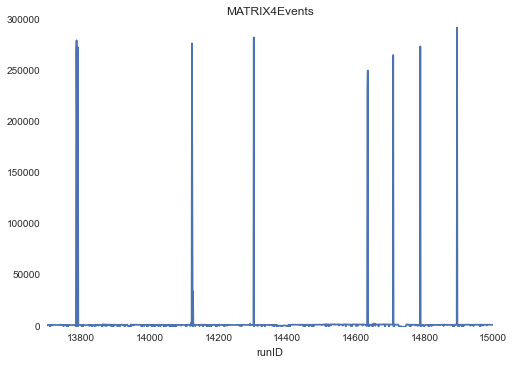

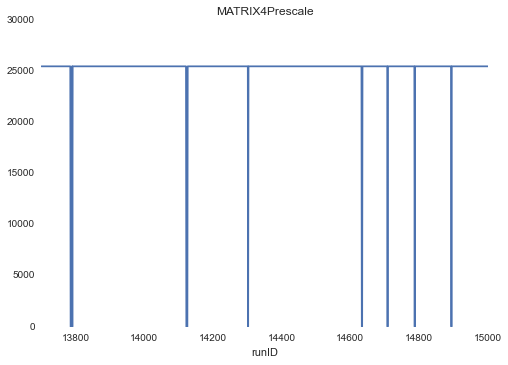

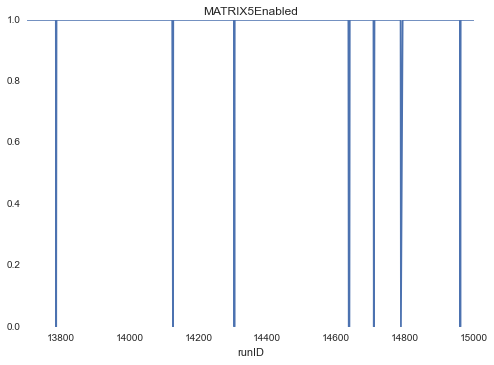

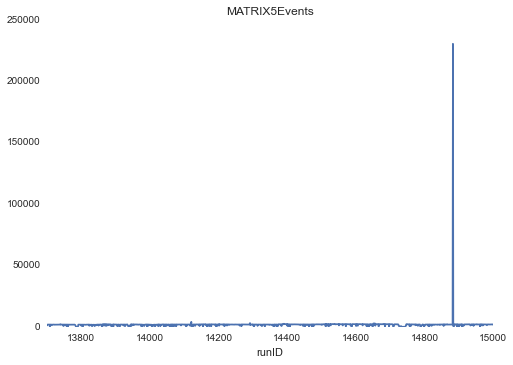

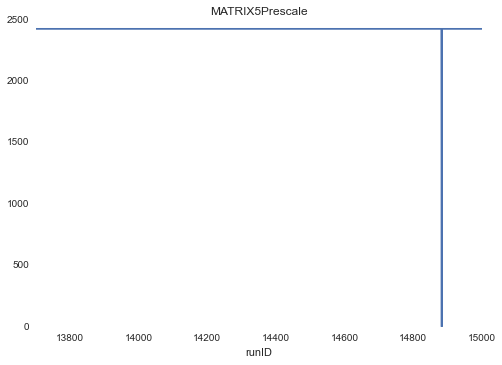

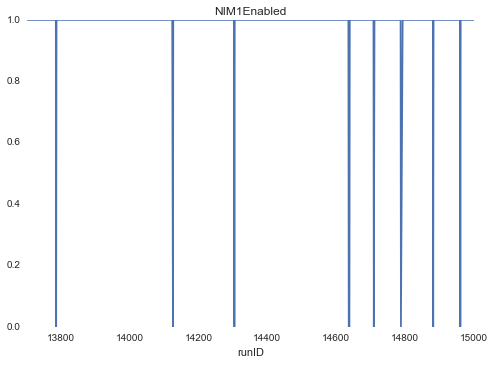

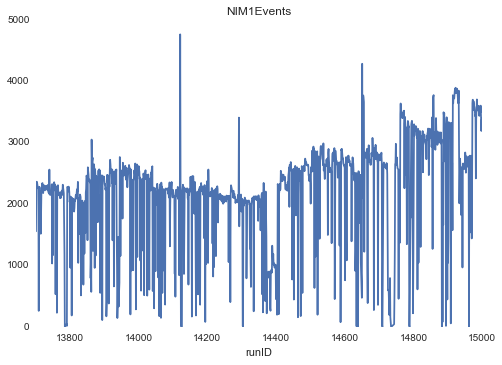

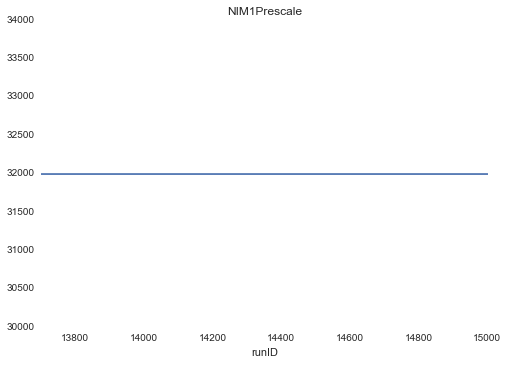

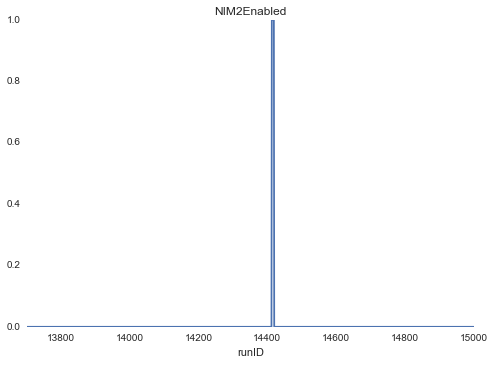

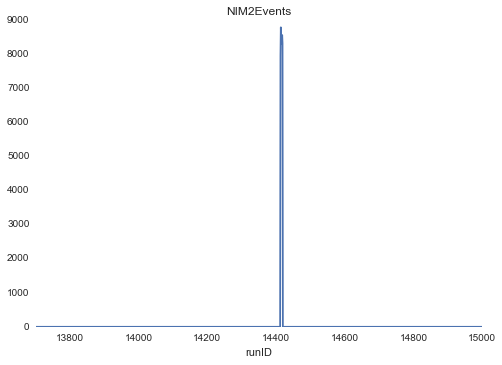

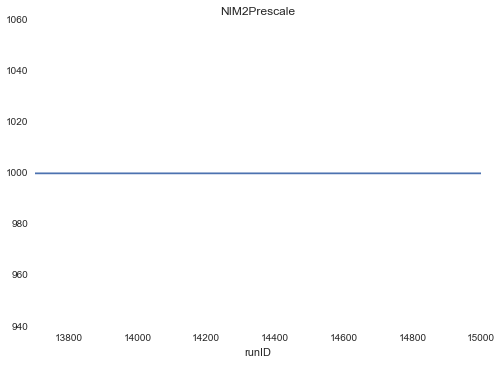

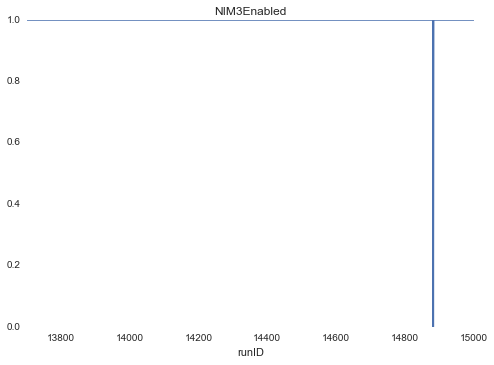

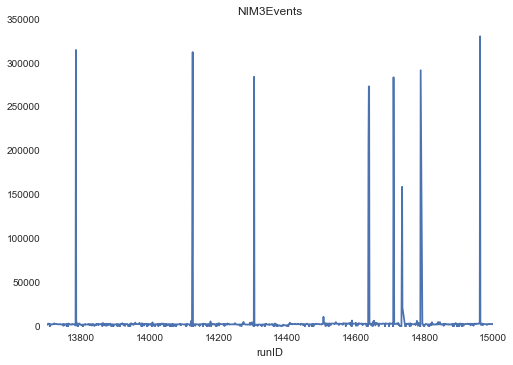

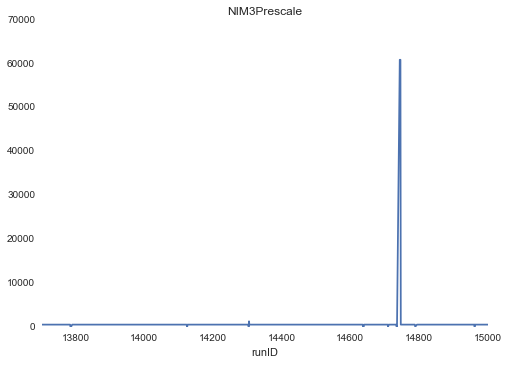

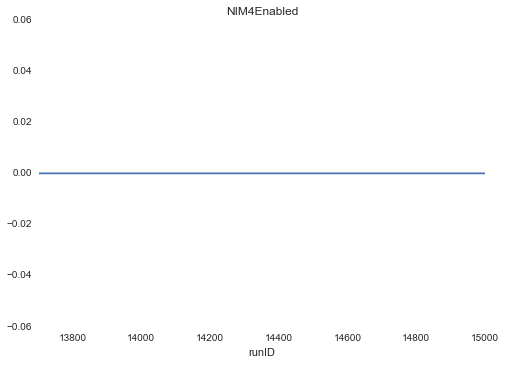

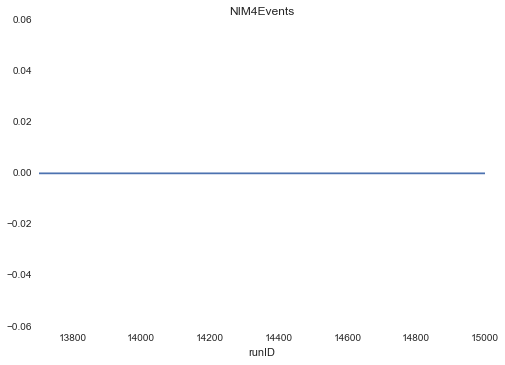

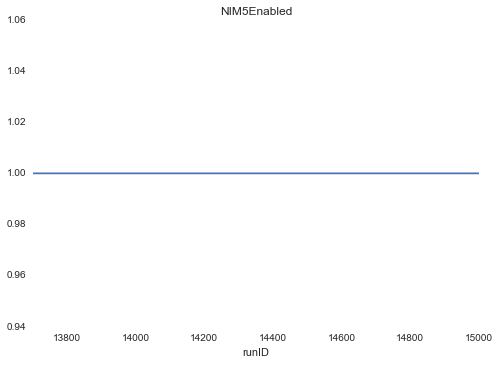

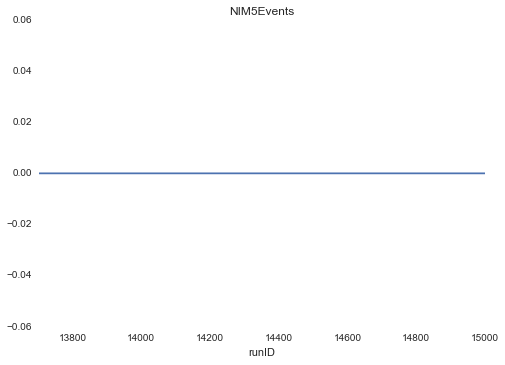

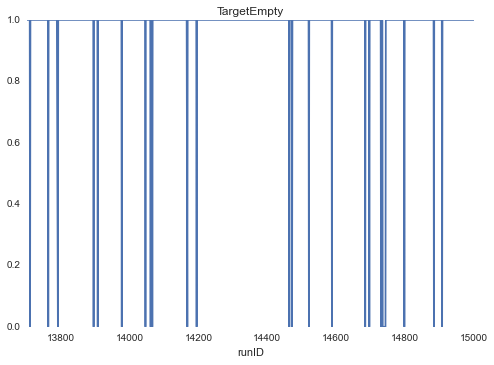

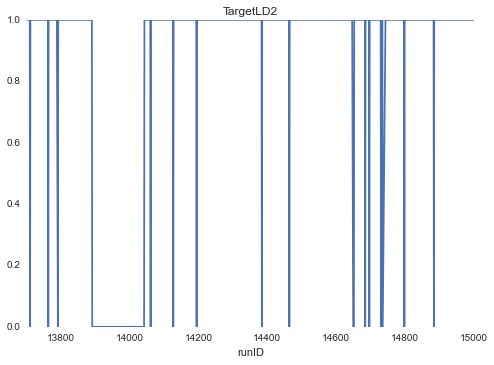

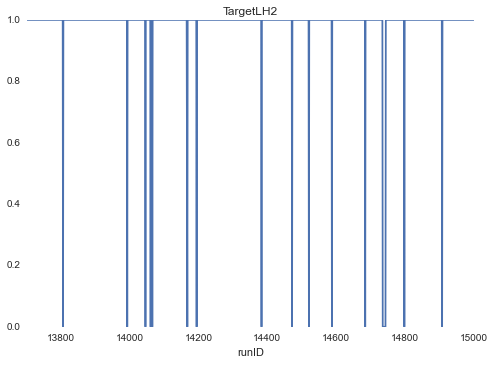

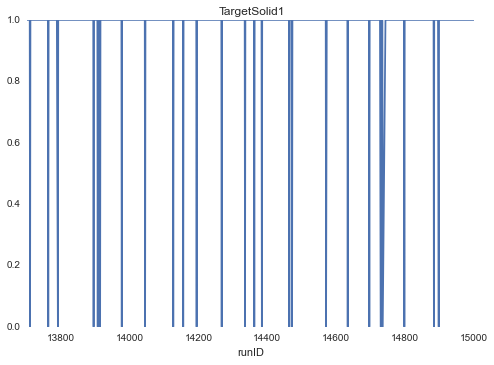

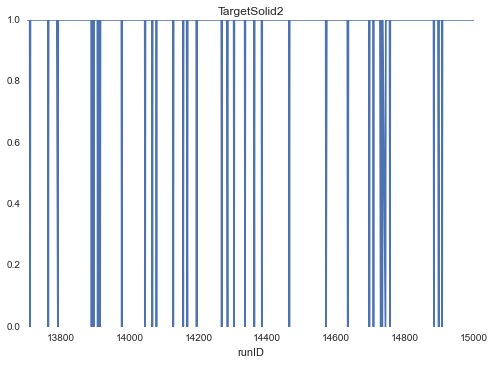

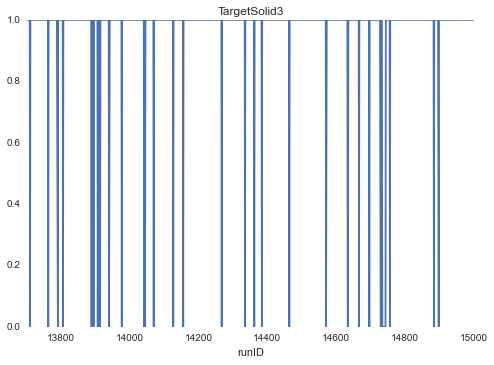

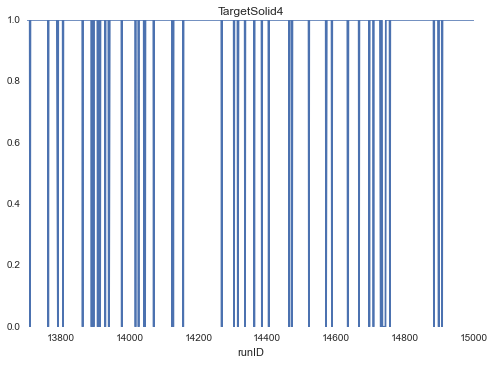

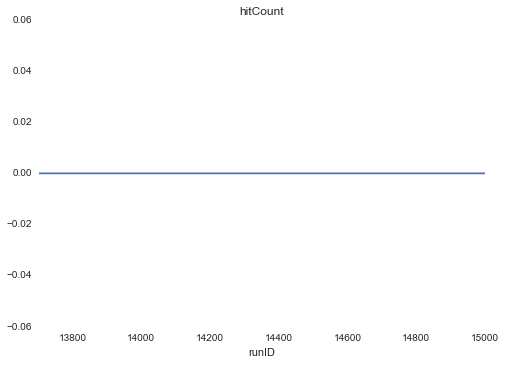

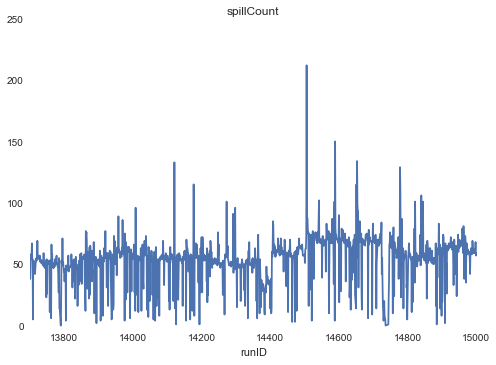

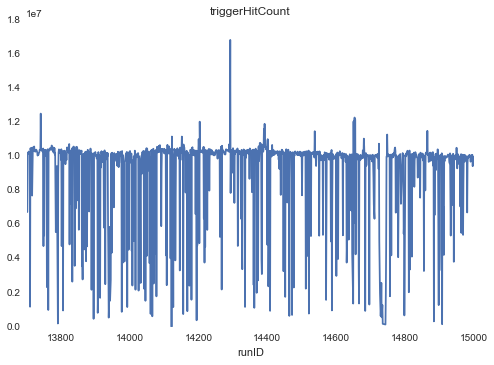

In [89]:
for column in columns:
    prun_df[column].plot()
    plt.title(column)
    plt.show()

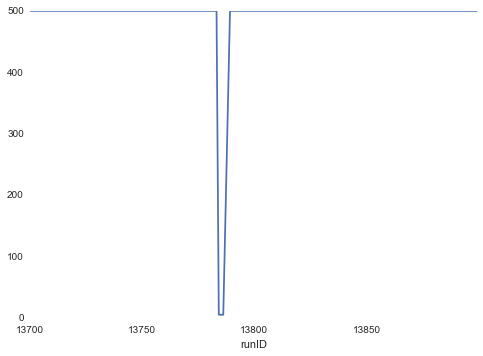

In [93]:
prun_df.query('runID < 13900').NIM3Prescale.plot()

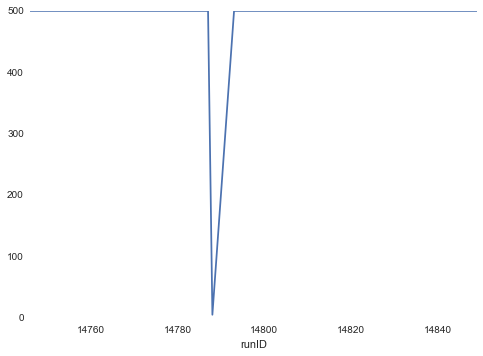

In [96]:
prun_df.query('runID > 14745 and runID < 14850').NIM3Prescale.plot()

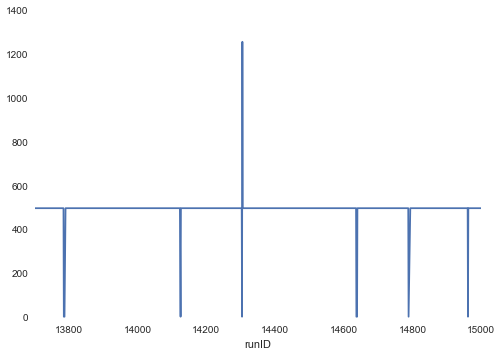

In [137]:
prun_df.query('runID > 14745 or runID < 14700').NIM3Prescale.plot()

In [130]:
query_beamdaq = """SELECT *
               FROM BeamDAQ INNER JOIN Spill USING(spillID)
               WHERE spillID BETWEEN 540000 AND 615000 AND
               dataQuality = 0 ORDER BY spillID"""

In [131]:
beamdaq_df = exec_query(query_beamdaq, server, schema)
beamdaq_df.head()

,spillID,timestamp,NM3ION,QIEsum,dutyfactor53MHz,inhibit_count,inhibit_block_sum,trigger_count,trigger_sum_no_inhibit,Inh_output_delay,...,QIE_phase_adjust,runID,liveProton,targetPos,dataQuality,BOScodaEventID,BOSvmeTime,EOScodaEventID,EOSvmeTime,time
0,540000,2015-03-08 01:47:45,5.493390e+12,2.396300e+11,42.4,840783,9.972510e+10,3905,28370500000,35,...,4,13590,2550134610146,3,0,152943,2104833,156853,2105398,2015-03-08 01:47:45
1,540001,2015-03-08 01:48:45,5.464580e+12,2.371140e+11,43.4,825138,9.618160e+10,4065,29045100000,35,...,4,13590,2574789538367,3,0,156988,2110887,161058,2111452,2015-03-08 01:48:45
2,540002,2015-03-08 01:49:47,5.463920e+12,2.372220e+11,42.7,836202,9.907850e+10,3923,28561200000,35,...,4,13590,2519021405232,3,0,161192,2116942,165119,2117507,2015-03-08 01:49:46
3,540007,2015-03-08 01:54:49,5.509130e+12,2.389600e+11,42.8,814311,1.007240e+11,3253,22792600000,35,...,4,13590,2657599284944,1,0,178042,2147213,181299,2147778,2015-03-08 01:54:50
4,540008,2015-03-08 01:55:50,5.490840e+12,2.371630e+11,42.3,828553,1.011420e+11,0,23309100000,35,...,4,13590,2597555491213,1,0,181435,2153268,184772,2153833,2015-03-08 01:55:53


In [132]:
beamdaq_df.head()

,spillID,timestamp,NM3ION,QIEsum,dutyfactor53MHz,inhibit_count,inhibit_block_sum,trigger_count,trigger_sum_no_inhibit,Inh_output_delay,...,QIE_phase_adjust,runID,liveProton,targetPos,dataQuality,BOScodaEventID,BOSvmeTime,EOScodaEventID,EOSvmeTime,time
0,540000,2015-03-08 01:47:45,5.493390e+12,2.396300e+11,42.4,840783,9.972510e+10,3905,28370500000,35,...,4,13590,2550134610146,3,0,152943,2104833,156853,2105398,2015-03-08 01:47:45
1,540001,2015-03-08 01:48:45,5.464580e+12,2.371140e+11,43.4,825138,9.618160e+10,4065,29045100000,35,...,4,13590,2574789538367,3,0,156988,2110887,161058,2111452,2015-03-08 01:48:45
2,540002,2015-03-08 01:49:47,5.463920e+12,2.372220e+11,42.7,836202,9.907850e+10,3923,28561200000,35,...,4,13590,2519021405232,3,0,161192,2116942,165119,2117507,2015-03-08 01:49:46
3,540007,2015-03-08 01:54:49,5.509130e+12,2.389600e+11,42.8,814311,1.007240e+11,3253,22792600000,35,...,4,13590,2657599284944,1,0,178042,2147213,181299,2147778,2015-03-08 01:54:50
4,540008,2015-03-08 01:55:50,5.490840e+12,2.371630e+11,42.3,828553,1.011420e+11,0,23309100000,35,...,4,13590,2597555491213,1,0,181435,2153268,184772,2153833,2015-03-08 01:55:53


In [133]:
beamdaq_df.set_index('spillID', drop=True, inplace=True)

In [134]:
beamdaq_df.head()

,timestamp,NM3ION,QIEsum,dutyfactor53MHz,inhibit_count,inhibit_block_sum,trigger_count,trigger_sum_no_inhibit,Inh_output_delay,QIE_inh_delay,...,QIE_phase_adjust,runID,liveProton,targetPos,dataQuality,BOScodaEventID,BOSvmeTime,EOScodaEventID,EOSvmeTime,time
spillID,,,,,,,,,,,,,,,,,,,,,
540000,2015-03-08 01:47:45,5.493390e+12,2.396300e+11,42.4,840783,9.972510e+10,3905,28370500000,35,45,...,4,13590,2550134610146,3,0,152943,2104833,156853,2105398,2015-03-08 01:47:45
540001,2015-03-08 01:48:45,5.464580e+12,2.371140e+11,43.4,825138,9.618160e+10,4065,29045100000,35,45,...,4,13590,2574789538367,3,0,156988,2110887,161058,2111452,2015-03-08 01:48:45
540002,2015-03-08 01:49:47,5.463920e+12,2.372220e+11,42.7,836202,9.907850e+10,3923,28561200000,35,45,...,4,13590,2519021405232,3,0,161192,2116942,165119,2117507,2015-03-08 01:49:46
540007,2015-03-08 01:54:49,5.509130e+12,2.389600e+11,42.8,814311,1.007240e+11,3253,22792600000,35,45,...,4,13590,2657599284944,1,0,178042,2147213,181299,2147778,2015-03-08 01:54:50
540008,2015-03-08 01:55:50,5.490840e+12,2.371630e+11,42.3,828553,1.011420e+11,0,23309100000,35,45,...,4,13590,2597555491213,1,0,181435,2153268,184772,2153833,2015-03-08 01:55:53


In [135]:
columns = beamdaq_df.columns.values
if 'timestamp' in columns:
    beamdaq_df.drop('timestamp', axis=1, inplace=True)
    columns = beamdaq_df.columns.values
if 'time' in columns:
    beamdaq_df.drop('time', axis=1, inplace=True)
    columns = beamdaq_df.columns.values
for column in columns:
    beamdaq_df[column] = beamdaq_df[column].astype(float)

NM3ION
spillID
540000    5.493390e+12
540001    5.464580e+12
540002    5.463920e+12
540007    5.509130e+12
540008    5.490840e+12
Name: NM3ION, dtype: float64


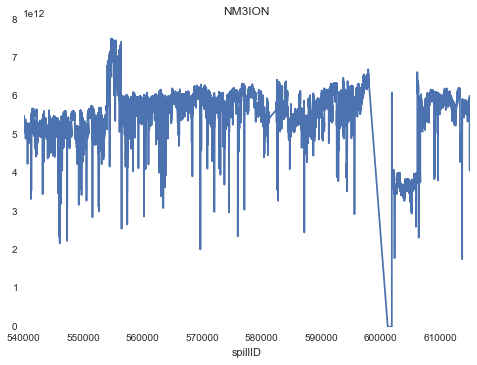

QIEsum
spillID
540000    2.396300e+11
540001    2.371140e+11
540002    2.372220e+11
540007    2.389600e+11
540008    2.371630e+11
Name: QIEsum, dtype: float64


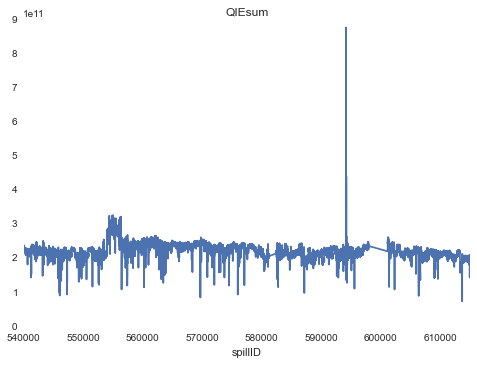

dutyfactor53MHz
spillID
540000    42.4
540001    43.4
540002    42.7
540007    42.8
540008    42.3
Name: dutyfactor53MHz, dtype: float64


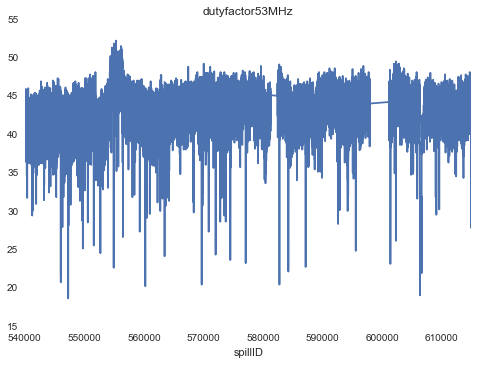

inhibit_count
spillID
540000    840783
540001    825138
540002    836202
540007    814311
540008    828553
Name: inhibit_count, dtype: float64


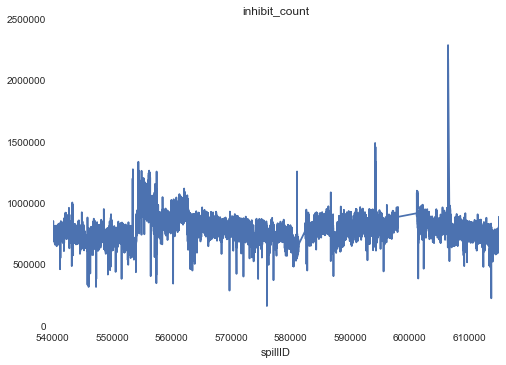

inhibit_block_sum
spillID
540000    9.972510e+10
540001    9.618160e+10
540002    9.907850e+10
540007    1.007240e+11
540008    1.011420e+11
Name: inhibit_block_sum, dtype: float64


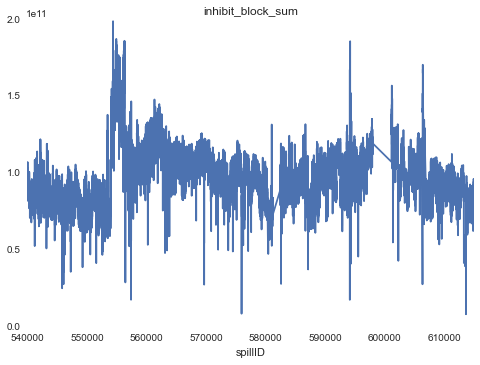

In [136]:
for column in columns[:5]:
    print column
    print beamdaq_df[column].head()
    beamdaq_df[column].plot(sort_columns='spillID')
    plt.title(column)
    plt.show()